In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv("us_counties_covid19_daily.csv")
df.head()

,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0.0
1,2020-01-22,Snohomish,Washington,53061.0,1,0.0
2,2020-01-23,Snohomish,Washington,53061.0,1,0.0
3,2020-01-24,Cook,Illinois,17031.0,1,0.0
4,2020-01-24,Snohomish,Washington,53061.0,1,0.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800437 entries, 0 to 800436
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   date    800437 non-null  object 
 1   county  800437 non-null  object 
 2   state   800437 non-null  object 
 3   fips    792846 non-null  float64
 4   cases   800437 non-null  int64  
 5   deaths  783704 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 36.6+ MB


In [4]:
df.isna().sum().sort_values(ascending=False).head(10)


deaths    16733
fips       7591
date          0
county        0
state         0
cases         0
dtype: int64

In [5]:
df["date"] = pd.to_datetime(df["date"])
df["date"].head()

0   2020-01-21
1   2020-01-22
2   2020-01-23
3   2020-01-24
4   2020-01-24
Name: date, dtype: datetime64[ns]

In [6]:
df = df.dropna(subset=["cases", "deaths"])


In [7]:
state_name = "California"
st = df[df["state"] == state_name].copy()

st.shape


(15293, 6)

In [8]:
daily = st.groupby("date", as_index=False)[["cases", "deaths"]].sum()
daily.head()

,date,cases,deaths
0,2020-01-25,1,0.0
1,2020-01-26,2,0.0
2,2020-01-27,2,0.0
3,2020-01-28,2,0.0
4,2020-01-29,2,0.0


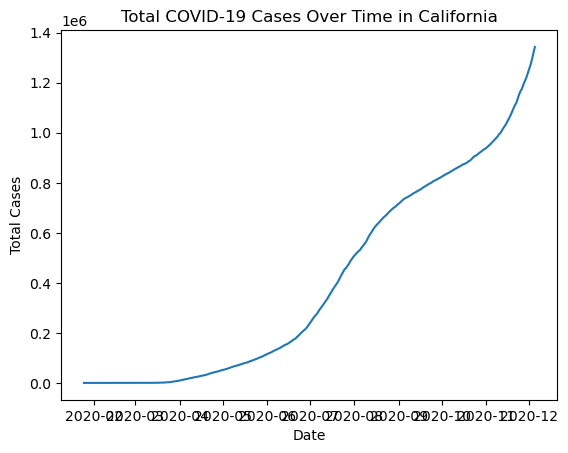

In [9]:
plt.figure()
plt.plot(daily["date"], daily["cases"])
plt.title(f"Total COVID-19 Cases Over Time in {state_name}")
plt.xlabel("Date")
plt.ylabel("Total Cases")
plt.show()

In [10]:
daily = daily.sort_values("date")
daily["new_cases"] = daily["cases"].diff()
daily["new_deaths"] = daily["deaths"].diff()

daily[["date","cases","new_cases","deaths","new_deaths"]].head(10)

,date,cases,new_cases,deaths,new_deaths
0,2020-01-25,1,NaN,0.0,NaN
1,2020-01-26,2,1.0,0.0,0.0
2,2020-01-27,2,0.0,0.0,0.0
3,2020-01-28,2,0.0,0.0,0.0
4,2020-01-29,2,0.0,0.0,0.0
5,2020-01-30,2,0.0,0.0,0.0
6,2020-01-31,3,1.0,0.0,0.0
7,2020-02-01,3,0.0,0.0,0.0
8,2020-02-02,6,3.0,0.0,0.0
9,2020-02-03,6,0.0,0.0,0.0


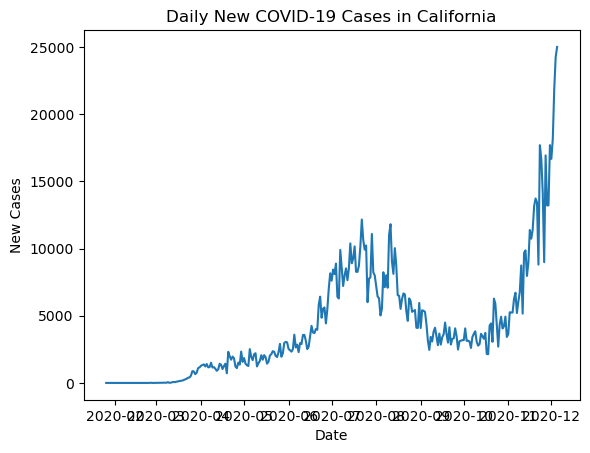

In [11]:
plt.figure()
plt.plot(daily["date"], daily["new_cases"])
plt.title(f"Daily New COVID-19 Cases in {state_name}")
plt.xlabel("Date")
plt.ylabel("New Cases")
plt.show()

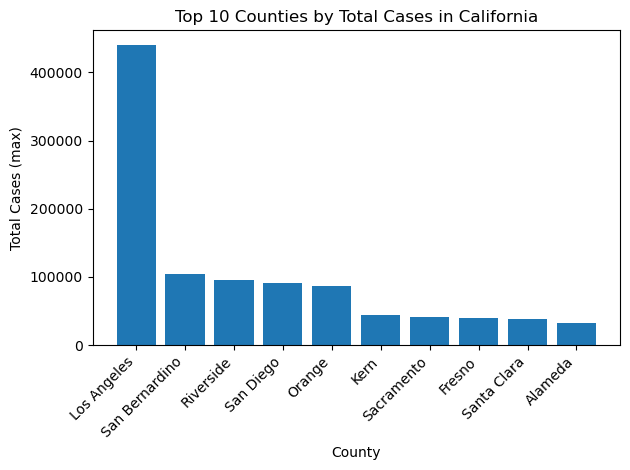

In [12]:
top10 = st.groupby("county")["cases"].max().sort_values(ascending=False).head(10)

plt.figure()
plt.bar(top10.index, top10.values)
plt.title(f"Top 10 Counties by Total Cases in {state_name}")
plt.xlabel("County")
plt.ylabel("Total Cases (max)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [13]:
daily["day_ordinal"] = daily["date"].map(pd.Timestamp.toordinal)

In [14]:
X = daily[["day_ordinal"]]
y = daily["cases"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5


rmse

113316.04190385852

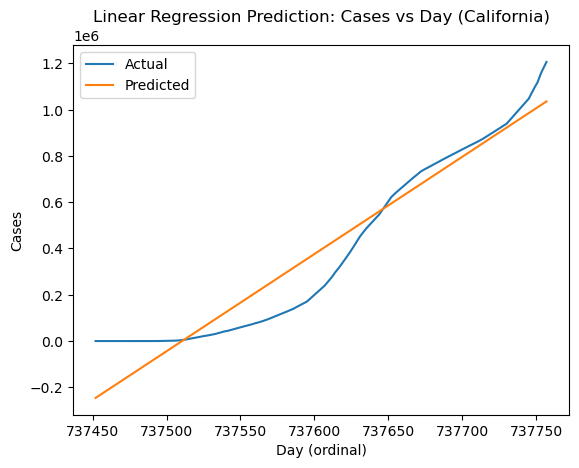

In [17]:
test_result = X_test.copy()
test_result["actual"] = y_test.values
test_result["predicted"] = y_pred
test_result = test_result.sort_values("day_ordinal")

plt.figure()
plt.plot(test_result["day_ordinal"], test_result["actual"], label="Actual")
plt.plot(test_result["day_ordinal"], test_result["predicted"], label="Predicted")
plt.title(f"Linear Regression Prediction: Cases vs Day ({state_name})")
plt.xlabel("Day (ordinal)")
plt.ylabel("Cases")
plt.legend()
plt.show()